In [11]:
library("randomForest")


In [12]:
credito <- read.csv(
    "../data/Credit.csv",
    sep = ",",
    na.strings = "",
    stringsAsFactors = TRUE
)

credito$class <- as.factor(credito$class)

dim(credito)
head(credito, 10)


[1] 1000   21

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,⋯,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
,<fct>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,⋯,<fct>,<int>,<fct>,<fct>,<int>,<fct>,<int>,<fct>,<fct>,<fct>
1,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,⋯,'real estate',67,none,own,2,skilled,1,yes,yes,good
2,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,⋯,'real estate',22,none,own,1,skilled,1,none,yes,bad
3,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,⋯,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
4,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,⋯,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
5,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,⋯,'no known property',53,none,'for free',2,skilled,2,none,yes,bad
6,'no checking',36,'existing paid',education,9055,'no known savings',1<=X<4,2,'male single',none,⋯,'no known property',35,none,'for free',1,'unskilled resident',2,yes,yes,good
7,'no checking',24,'existing paid',furniture/equipment,2835,500<=X<1000,>=7,3,'male single',none,⋯,'life insurance',53,none,own,1,skilled,1,none,yes,good
8,0<=X<200,36,'existing paid','used car',6948,<100,1<=X<4,2,'male single',none,⋯,car,35,none,rent,1,'high qualif/self emp/mgmt',1,yes,yes,good
9,'no checking',12,'existing paid',radio/tv,3059,>=1000,4<=X<7,2,'male div/sep',none,⋯,'real estate',61,none,own,1,'unskilled resident',1,none,yes,good


In [13]:
amostra <- sample(2, nrow(credito), replace = TRUE, prob = c(0.7, 0.3))
treino <- credito[amostra == 1, ]
teste <- credito[amostra == 2, ]


In [14]:
floresta <- randomForest(class ~ ., data = treino, ntree = 100, importance = TRUE)
floresta



Call:
 randomForest(formula = class ~ ., data = treino, ntree = 100,      importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 100
No. of variables tried at each split: 4

        OOB estimate of  error rate: 23.44%
Confusion matrix:
     bad good class.error
bad   90  124  0.57943925
good  41  449  0.08367347

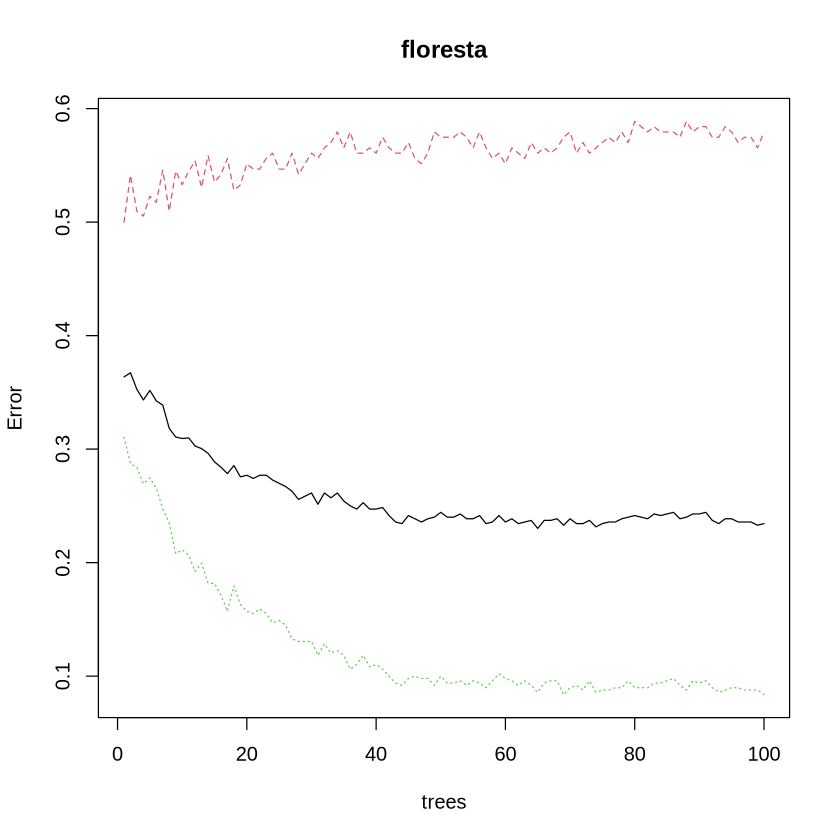

In [15]:
plot(floresta)


In [16]:
previsao <- predict(floresta, newdata = teste)
previsao


2    4    5    6   12   19   21   25   27   43   47   53   54   56   57   61 
 bad  bad  bad good  bad  bad good good good good good good good good good good 
  62   63   64   65   66   70   71   76   78   85   92   97   98  104  106  109 
good  bad  bad good good good good good good good good good good good  bad good 
 113  115  116  124  127  135  144  145  146  153  156  157  158  171  173  174 
good good good good good good good good  bad  bad good good  bad  bad good good 
 175  179  182  190  197  198  204  206  218  221  224  232  239  242  245  246 
good good good good good good good  bad good good good good good good good good 
 247  248  255  257  259  262  266  269  272  280  284  287  291  304  305  306 
good good good good good good good  bad good good good  bad good good good good 
 309  315  317  320  324  327  328  335  337  338  340  346  348  350  359  361 
good good good good good good good  bad good good good good good good good good 
 364  370  372  376  377  381  384  386  387  390  393  394  398  407  410  411 
good good good  bad good good good good good good good good good good good good 
 412  416  421  425  428  431  435  436  437  443  444  447  451  453  454  458 
good good good good good good good good good good good  bad good good good good 
 459  466  469  471  476  478  479  480  484  486  492  493  495  498  506  507 
good good good good good good good good good good  bad good good good good good 
 509  515  520  522  526  528  529  532  533  536  540  544  545  550  551  552 
good good good good good good  bad good good good good good good good good good 
 556  557  563  569  573  574  578  582  587  589  593  594  599  604  606  612 
good good good good good good good good good good good good good good good good 
 617  618  620  622  624  626  627  637  640  649  650  652  655  657  662  666 
good good good good good good good good  bad good  bad good good good good good 
 673  676  678  681  684  689  692  694  697  698  701  702  707  708  713  719 
good good  bad good good good good good good good good  bad  bad  bad good good 
 727  737  740  743  745  749  754  760  765  767  768  769  770  773  775  779 
good  bad  bad good  bad good good good good good good good good good good good 
 782  783  785  787  794  797  798  800  801  803  807  809  810  811  812  818 
good good good good good good good good good good good  bad  bad good good good 
 819  820  825  826  829  831  833  836  849  851  852  873  877  879  882  883 
 bad good good  bad good good  bad  bad good good good good  bad good good good 
 886  888  893  895  898  899  900  901  903  905  906  907  912  913  915  918 
 bad  bad good good good good good good good good good good good good  bad  bad 
 920  921  927  929  930  932  937  939  949  953  960  963  970  976  978  980 
good good  bad good good good good  bad good good good good good good good  bad 
 986  989  992  995  997  998  999 1000 
good good good good good good  bad good 
Levels: bad good

In [17]:
confusao <- table(previsao, teste$class)
confusao


        
previsao bad good
    bad   32   12
    good  54  198

In [18]:
taxa_acerto <- (confusao[1, 1] + confusao[2, 2]) / sum(confusao)
taxa_acerto


[1] 0.777027

In [19]:
taxa_erro <- (confusao[1, 2] + confusao[2, 1]) / sum(confusao)
taxa_erro


[1] 0.222973